# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 11</font>

## Download: http://github.com/dsacademybr

## Prevendo a Ocorrência de Diabetes

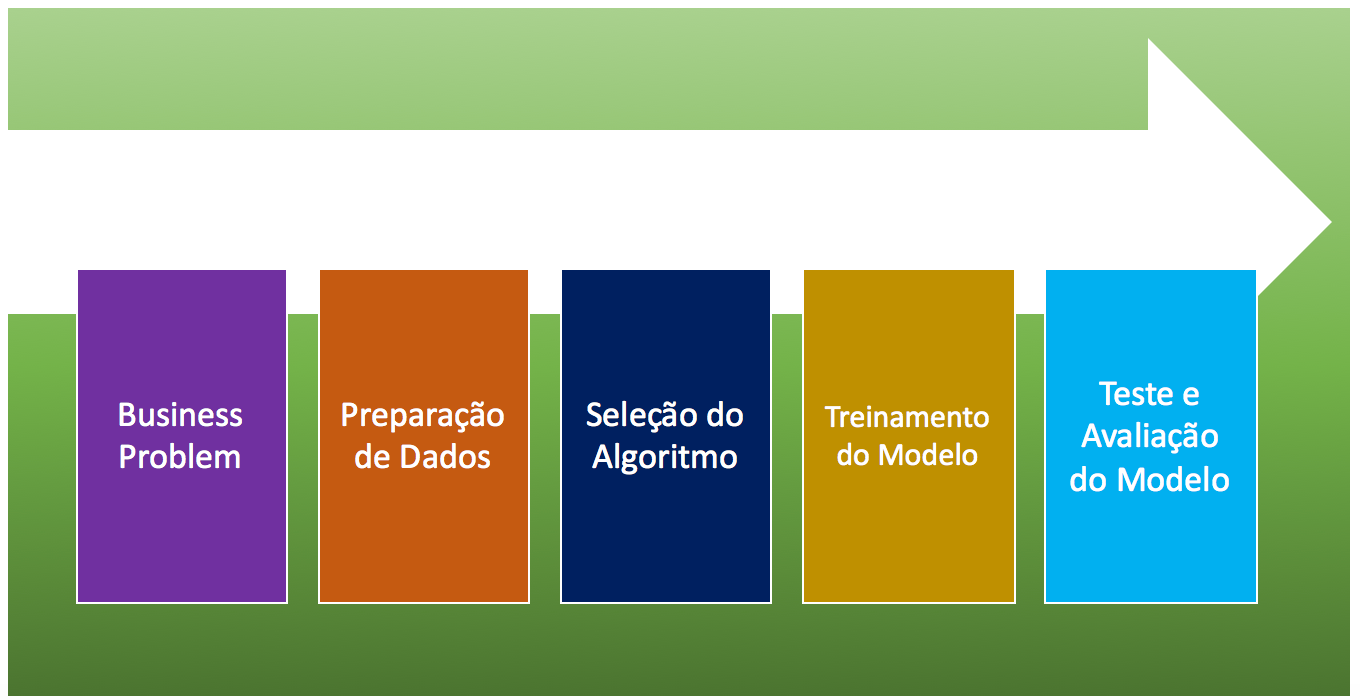

In [1]:
from IPython.display import Image
Image('Workflow.png')

## Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [2]:
# Importando os módulos
import pandas as pd                 
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline             

In [3]:
# Carregando o dataset
df = pd.read_csv("pima-data.csv")   

In [4]:
# Verificando o formato dos dados
df.shape

(768, 10)

In [5]:
# Verificando as primeiras linhas do dataset
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
# Verificando as últimas linhas do dataset
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [7]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [8]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

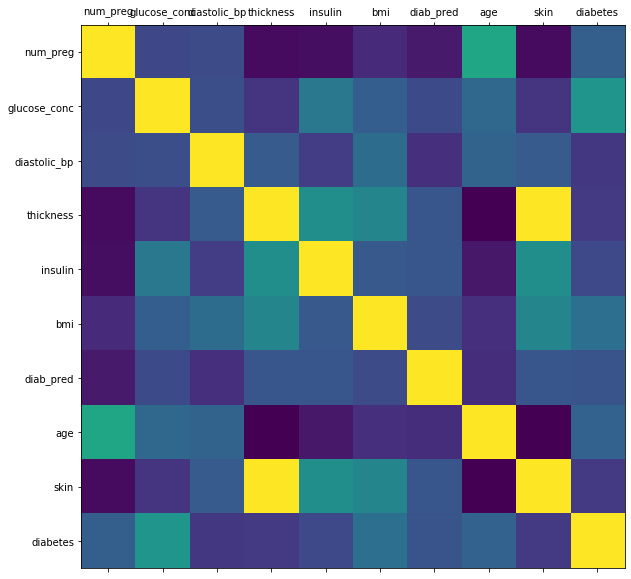

In [9]:
# Criando o gráfico
plot_corr(df)

In [10]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


## O modelo de machine learning não entende textos , por isso tranformamos a variavel para inteiro

In [10]:
# Definindo as classes
diabetes_map = {True : 1, False : 0}

In [11]:
# Aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [36]:
# Verificando as primeiras linhas do dataset
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [12]:
# Verificando como os dados estão distribuídos
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


## Spliting

70% para dados de treino e 30% para dados de teste

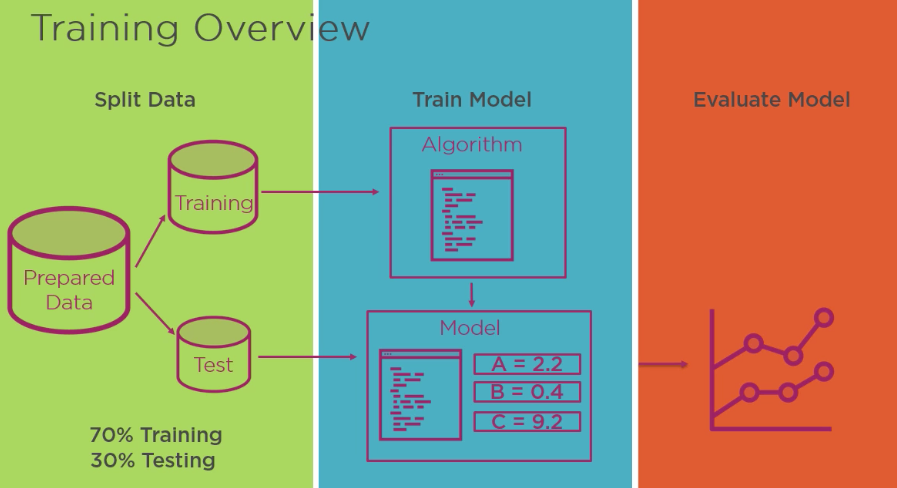

In [13]:
from IPython.display import Image
Image('Treinamento.png')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [16]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [17]:
# Variável a ser prevista( target)
atrib_prev = ['diabetes']

In [18]:
# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [19]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [45]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [20]:
# Definindo a taxa de split
split_test_size = 0.25

In [21]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [22]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

75.00% nos dados de treino
25.00% nos dados de teste


In [49]:
X_treino

array([[ 13.   , 129.   ,   0.   , ...,  39.9  ,   0.569,  44.   ],
       [  4.   , 129.   ,  86.   , ...,  35.1  ,   0.231,  23.   ],
       [  3.   ,  61.   ,  82.   , ...,  34.4  ,   0.243,  46.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

## Verificando o Split

In [23]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 199 (34.55%)
Training False : 377 (65.45%)

Test True : 69 (35.94%)
Test False : 123 (64.06%)


## Valores Missing Ocultos



In [24]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [25]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [26]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


## Tratando Dados Missing - Impute 
Substituindo os valores iguais a zero, pela média dos dados

In [28]:
from sklearn.impute import SimpleImputer

## nesse trecho missing_values = 0 , estou dizendo que os valores missing no dataset são os que tem valores igual a zero.

In [29]:
preenche_0 = SimpleImputer(missing_values=0, strategy='mean')

In [30]:
# Criando objeto


# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [31]:
X_treino

array([[ 13.        , 129.        ,  72.26534296, ...,  39.9       ,
          0.569     ,  44.        ],
       [  4.        , 129.        ,  86.        , ...,  35.1       ,
          0.231     ,  23.        ],
       [  3.        ,  61.        ,  82.        , ...,  34.4       ,
          0.243     ,  46.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.39795918, 141.        ,  72.26534296, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.39795918, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

## 50 a 80% do tempo de trabalho de um Cientista de Dados é usado na preparação dos dados.

## Construindo e treinando o modelo

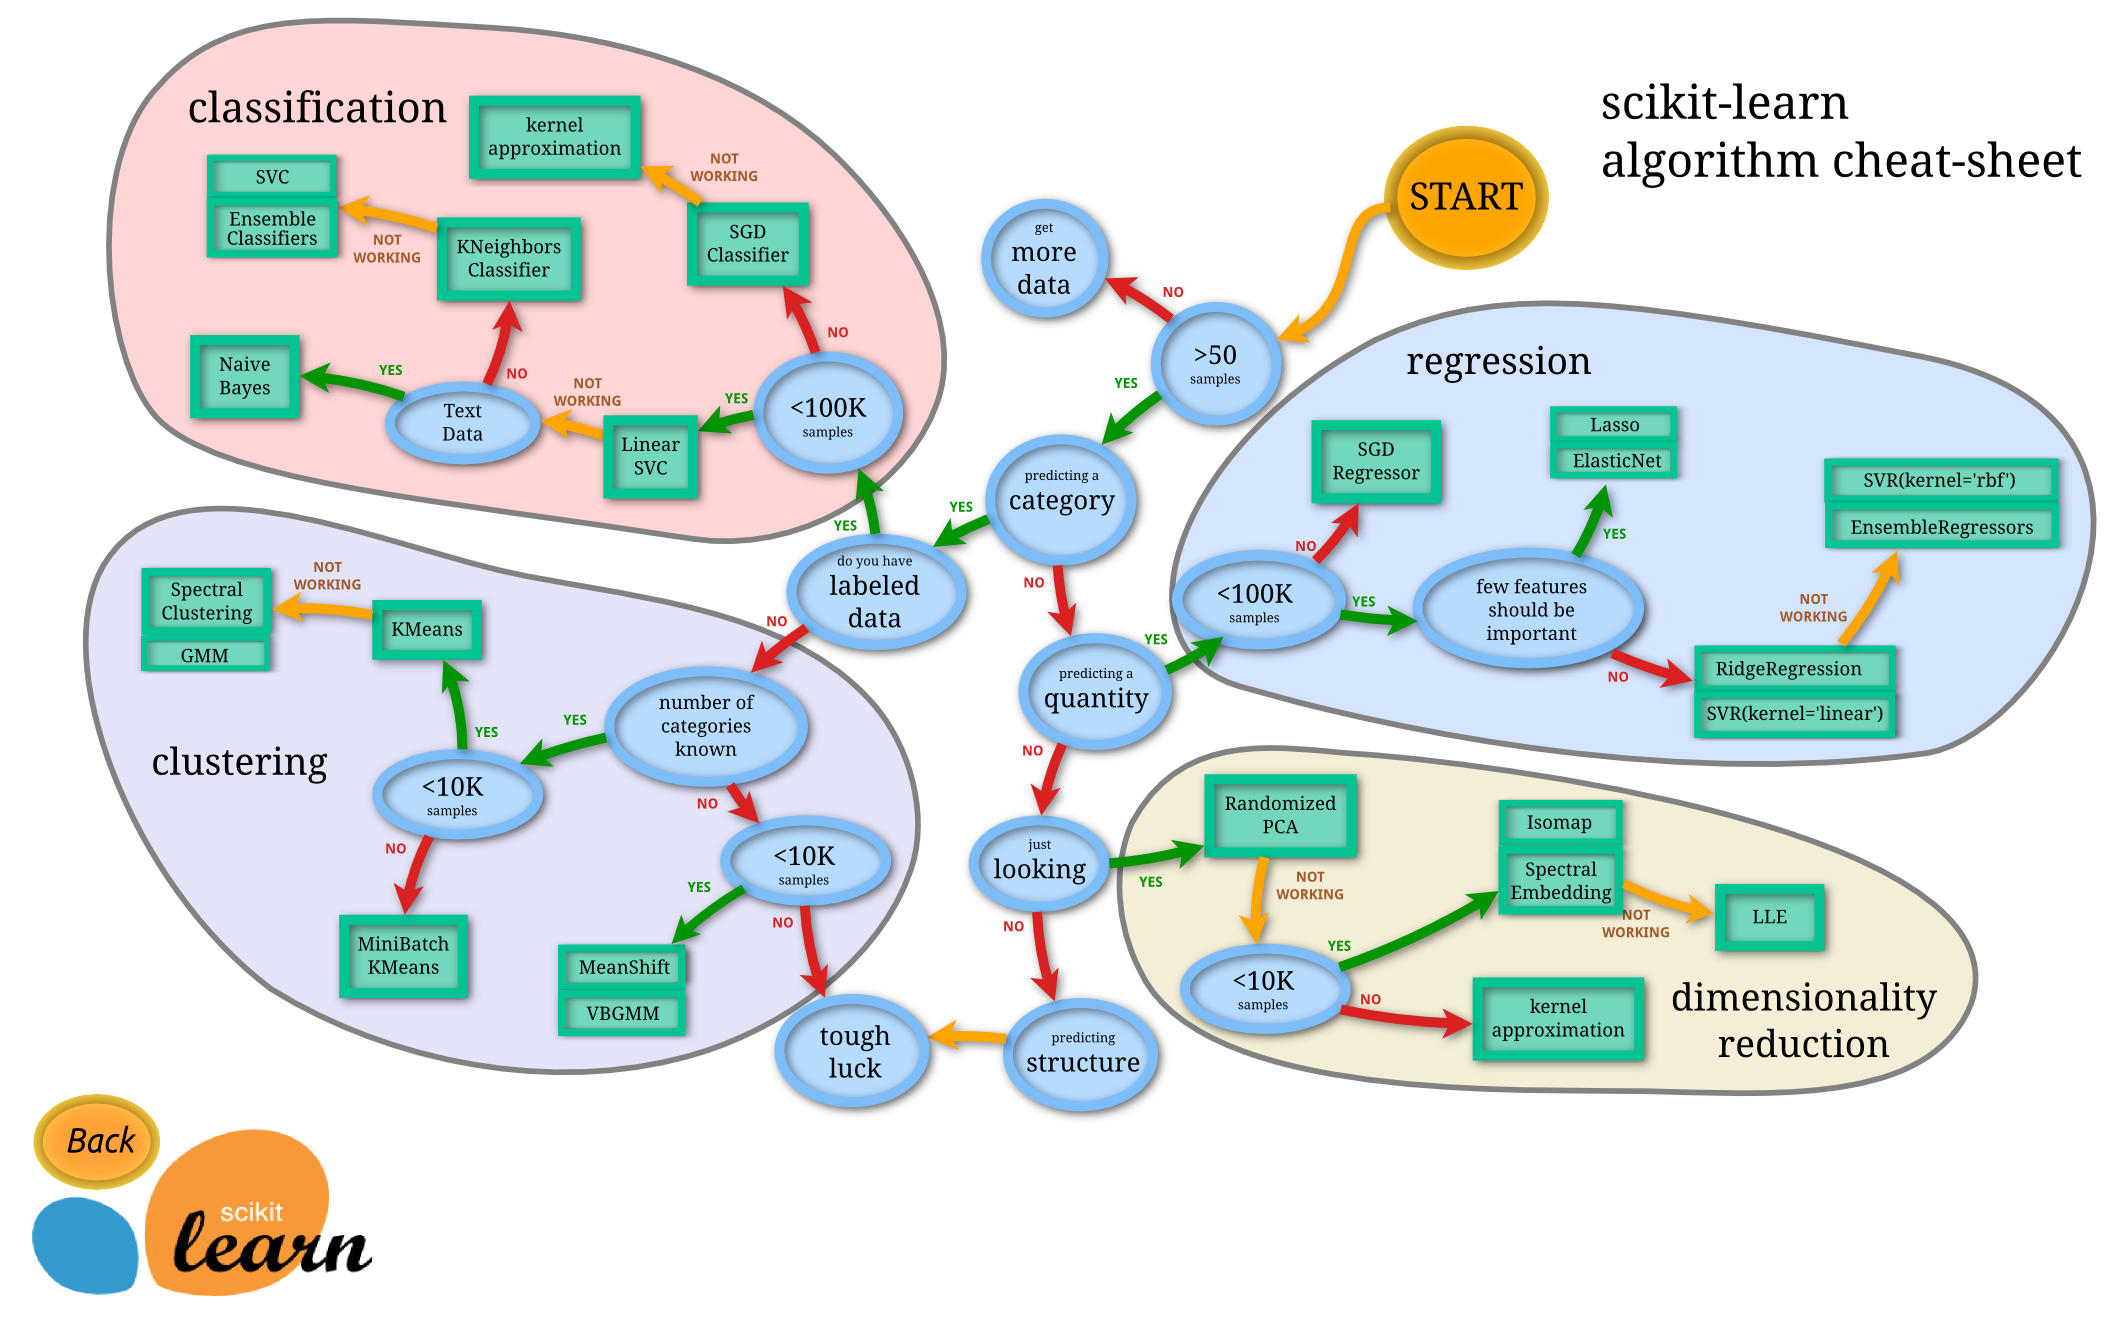

In [35]:
from IPython.display import Image
Image(r'D:\Repos\AprendendoPython\Curso_Python_DSA\Cap08 (pydata)\Notebooks\ml_map.png')

In [81]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [82]:
# Criando o modelo preditivo
modelo_v1_GaussianNB = GaussianNB()

In [83]:
# Treinando o modelo
modelo_v1_GaussianNB.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Verificando a exatidão no modelo nos dados de treino

In [39]:
from sklearn import metrics

In [84]:
predict_train_modelo_v1_GaussianNB_treino = modelo_v1_GaussianNB.predict(X_treino)


In [86]:
print("Exatidão Modelo V1_GaussianNB (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, predict_train_modelo_v1_GaussianNB)))
print()

Exatidão Modelo V1_GaussianNB (Accuracy): 0.7569



## Verificando a exatidão no modelo nos dados de teste

In [114]:
predict_modelo_v1_GaussianNB_test = modelo_v1_GaussianNB.predict(X_teste)

In [115]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_modelo_v1_GaussianNB_test)))
print()

Exatidão (Accuracy): 0.7240



## Métricas

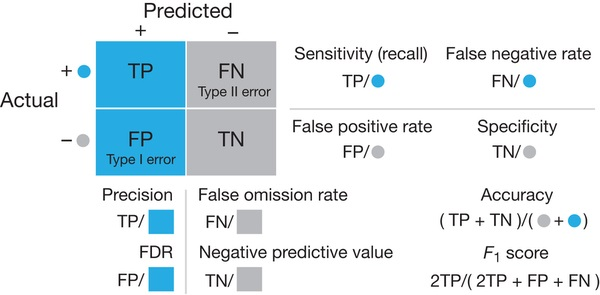

In [89]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [116]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, predict_modelo_v1_GaussianNB_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, predict_modelo_v1_GaussianNB_test, labels = [1, 0]))

Confusion Matrix
[[46 23]
 [30 93]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.67      0.63        69
           0       0.80      0.76      0.78       123

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.71       192
weighted avg       0.73      0.72      0.73       192



# Otimizando o modelo com RandomForest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
modelo_v2_RandomForestClassifier = RandomForestClassifier(random_state = 42)
modelo_v2_RandomForestClassifier.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [119]:
# Verificando os dados de treino
predict_modelo_RandomForestClassifier_train = modelo_v2_RandomForestClassifier.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, predict_modelo_RandomForestClassifier_train)))

Exatidão (Accuracy): 1.0000


In [120]:
# Verificando nos dados de teste
predict_modelo_RandomForestClassifier_test = modelo_v2_RandomForestClassifier.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_modelo_RandomForestClassifier_test)))
print()

Exatidão (Accuracy): 0.7292



In [121]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, predict_modelo_RandomForestClassifier_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, predict_modelo_RandomForestClassifier_test, labels = [1, 0]))

Confusion Matrix
[[45 24]
 [28 95]]

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        69
           0       0.80      0.77      0.79       123

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



# Utilizando o Algortimo de BaggingClassifier

In [122]:
from sklearn.ensemble import BaggingClassifier


In [123]:
modelo_BaggingClassifier = BaggingClassifier(random_state = 42)
modelo_BaggingClassifier.fit(X_treino, Y_treino.ravel())

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

## dados de treino 

In [125]:
# Verificando os dados de treino
predict_modelo_BaggingClassifier_train= modelo_BaggingClassifier.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, predict_modelo_BaggingClassifier_train)))

Exatidão (Accuracy): 0.9809


## Dados de teste

In [126]:
# Verificando nos dados de teste
predict_modelo_BaggingClassifier_test = modelo_BaggingClassifier.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_modelo_BaggingClassifier_test)))
print()

Exatidão (Accuracy): 0.7396



## Matriz de Confusão


In [127]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, predict_modelo_BaggingClassifier_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, predict_modelo_BaggingClassifier_test, labels = [1, 0]))

Confusion Matrix
[[45 24]
 [26 97]]

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.65      0.64        69
           0       0.80      0.79      0.80       123

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



# Utilzando o Algortimo de  KNeighborsClassifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
modelo_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=3,leaf_size=40)
modelo_KNeighborsClassifier.fit(X_treino, Y_treino.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Dados de treino 

In [131]:
# Verificando os dados de treino
predict_KNeighborsClassifier_train = modelo_KNeighborsClassifier.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, predict_KNeighborsClassifier_train)))

Exatidão (Accuracy): 0.8420


## dados de teste

In [132]:
# Verificando nos dados de teste
predict_KNeighborsClassifier_test = modelo_KNeighborsClassifier.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_KNeighborsClassifier_test)))
print()

Exatidão (Accuracy): 0.6771



## Regressão Logística

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
# Terceira versão do modelo usando Regressão Logística
modelo_LogisticRegression = LogisticRegression(C = 0.7, random_state = 42)
modelo_LogisticRegression.fit(X_treino, Y_treino.ravel())
predict_LogisticRegression_test = modelo_LogisticRegression.predict(X_teste)

In [135]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_LogisticRegression_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, predict_LogisticRegression_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7396

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.61      0.63        69
           0       0.79      0.81      0.80       123

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



In [138]:
print("Exatidão GaussianNB (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_modelo_v1_GaussianNB_test)))
print()

print("Exatidão RandomForestClassifier (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_modelo_RandomForestClassifier_test)))
print()

print("Exatidão BaggingClassifier (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_modelo_BaggingClassifier_test)))
print()

print("Exatidão  KNeighborsClassifier (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_KNeighborsClassifier_test)))
print()


Exatidão GaussianNB (Accuracy): 0.7240

Exatidão RandomForestClassifier (Accuracy): 0.7292

Exatidão BaggingClassifier (Accuracy): 0.7396

Exatidão  KNeighborsClassifier (Accuracy): 0.6771



In [51]:
### Resumindo
## Exatidão nos dados de teste

# Modelo usando algoritmo Naive Bayes         = 0.7359
# Modelo usando algoritmo Random Forest       = 0.7100
# Modelo usando algoritmo Regressão Logística = 0.7446

## Fazendo Previsões Com o Modelo Treinado

In [79]:
import pickle

In [80]:
# Salvando o modelo para usar mais tarde
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [54]:
X_teste

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

In [55]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

[0]
[1]


# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>